In [4]:
import pandas as pd


In [5]:
df= pd.read_csv('/Users/sripadma/Desktop/Data science/Data/titanic.csv')

In [6]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
##Missing Values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# any relationship between age,cabin   #  missing completely at random CMAR
# df['Embarked'].isnull()
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


# missing data is not random there is noe a relationship between the datas in the dataset
#converting null to binary 0/1


In [10]:
import numpy as np
df['Cabin_null']= np.where(df['Cabin'].isnull(),1,0)

In [11]:
df['Cabin_null'].mean()
#mean- finding the percentage

0.7710437710437711

In [12]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_null'],
      dtype='object')

In [13]:
df['Cabin_null']

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: Cabin_null, Length: 891, dtype: int64

In [14]:
df.groupby(['Survived'])['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

# missing at random(MAR), all the techiniques of handling, missing values
1. Mean/Median/Mode replacement
2.Random sample imputation
3.Capturing NAN values with a new feature
4.End of Distributed imputation
5. ARbitrary imputation
6. Frquent Categories imputation

#1. Mean/Median/Mode replacement
when should apply: 
Mean/Median/Mode has the assumption that the data are missing completely at random. Solve this by replacing the NAN with the most frequent occurance of the variables.

In [15]:
df= pd.read_csv('/Users/sripadma/Desktop/Data science/Data/titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [16]:
# go and see the percentae of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [17]:
# created the function:    
def impute_nan(df,variable,median):
   df[variable+'_median']=df[variable].fillna(median)

In [18]:
median=df.Age.median()

In [19]:
median

28.0

In [20]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [21]:
print(df['Age'].std())

14.526497332334044


In [22]:
print(df['Age_median'].std())

13.019696550973194


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

NameError: name 'lables' is not defined

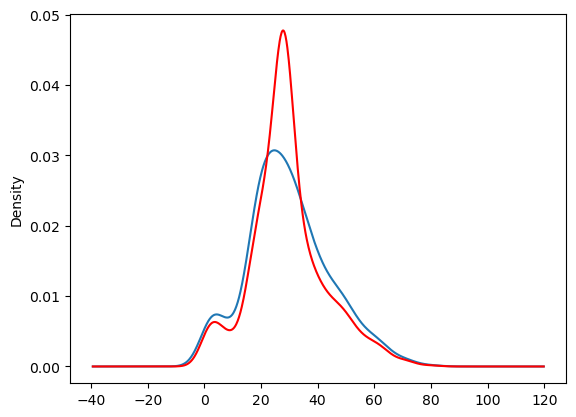

In [24]:
fig= plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax,color='red')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,lables,loc='best')


2.Random sample imputation
It consist of taking random observations from the dataset and we use this observation to replace the nan values.
It used assumes that the data are missing completely at random(MCAR)


In [27]:
df.isnull().sum()


Survived        0
Age           177
Fare            0
Age_median      0
dtype: int64

In [ ]:
df.isnull().mean()

In [ ]:
df['Age'].isnull().sum()

In [ ]:
df['Age'].dropna()

In [ ]:
df['Age'].dropna().sample()

In [ ]:
df['Age'].dropna().sample(df['Age'].isnull().sum())

In [ ]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

In [28]:
df[df['Age'].isnull()].index

Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
       ...
       832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
      dtype='int64', length=177)

In [25]:
def impute_nan(df,variable,median):
    df[variable+'_median']=df[variable].fillna(median)
    df[variable+'_random']=df[variable]
    # It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    #pnadas need to have same index in order to merge the data
    random_sample.index=df[variable].isnull().index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [29]:
median=df.Age.median()


In [30]:
median

28.0

In [33]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

NameError: name 'lable' is not defined

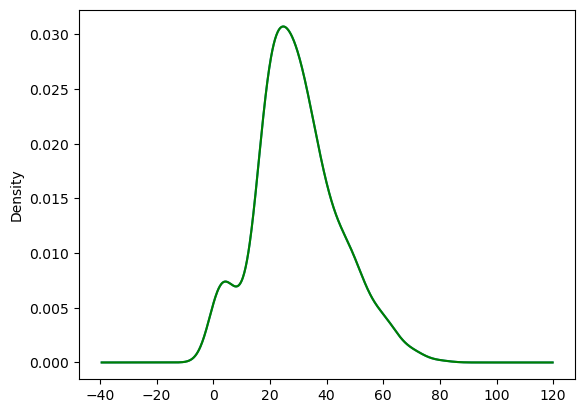

In [38]:
fig= plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_random.plot(kind='kde',ax=ax,color='green')
lines,label = ax.get_legend_handles_labels()
ax.legend(lines,lable,loc='best')

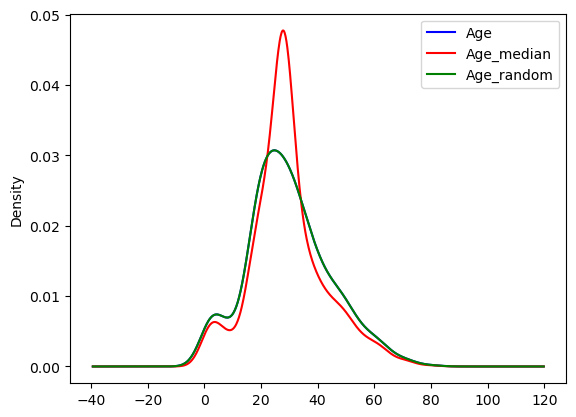

In [42]:
fig= plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax,color='Blue')
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
ax.legend(lines, labels, loc='best')


Adv:
easy to implement, there is less distortion in variance
disadv:
every situation randomness wont work


capturing NAN values with a new feature

It works well if the data are not missing completely are random



In [43]:
df= pd.read_csv('/Users/sripadma/Desktop/Data science/Data/titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [44]:
import numpy as np

In [45]:
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [46]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [48]:
df.Age.mean()

29.69911764705882

In [49]:
df.Age.median()

28.0

In [51]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [52]:
df.head(50)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [ ]:
##Adv:
Easy to implement, 
captures the importance of missing values
## disadv:
creating additional features(curse of dimensionality)

End of Distributed imputation

In [53]:
df= pd.read_csv('/Users/sripadma/Desktop/Data science/Data/titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<Axes: >

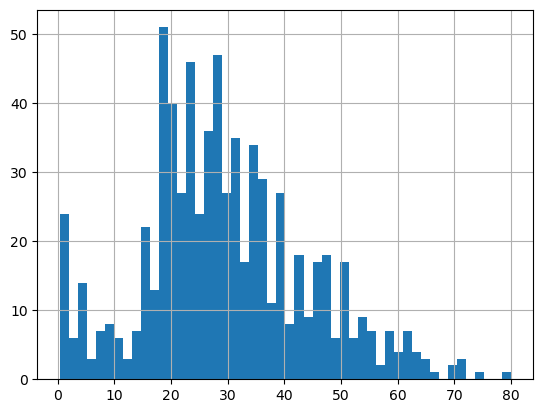

In [54]:
df.Age.hist(bins=50)

from this disturituion taking end of the disturtion i.e 70-80. making them null

In [55]:
df.Age.mean()

29.69911764705882

In [56]:
df.Age.mean()+ 3*df.Age.std()

73.27860964406095

<Axes: xlabel='Age'>

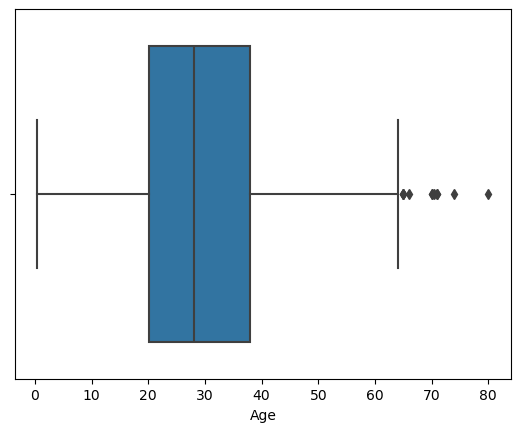

In [59]:
import seaborn as sns
sns.boxplot(x='Age',data=df)

In [78]:
def impute_nan(df,varible,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [79]:
impute_nan(df,'Age',df.Age.median(),extreme)

NameError: name 'extreme' is not defined

In [80]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<Axes: >

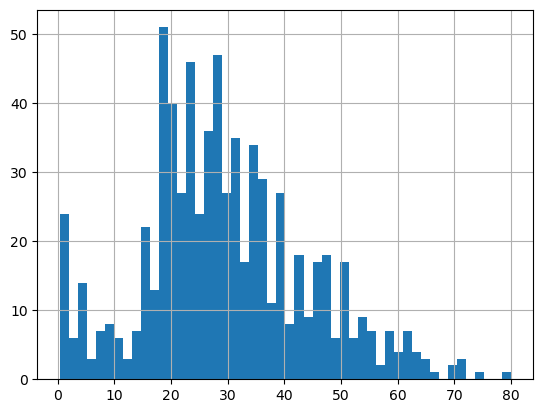

In [81]:
df['Age'].hist(bins=50)

In [82]:
df['Age_end_distribution'].hist(bins=50)

KeyError: 'Age_end_distribution'

In [84]:
sns.boxplot(x= 'Age_end_distribution',data =df)

ValueError: Could not interpret input 'Age_end_distribution'

Arbitrary value imputation
It consists of replacing NAN by an arbitrary value

In [85]:
df= pd.read_csv('/Users/sripadma/Desktop/Data science/Data/titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [89]:
def impute_nan(df,variable):
     df[variable+'_zeros']=df[variable].fillna(0)
     df[variable+'_hundred']=df[variable].fillna(100)

<Axes: >

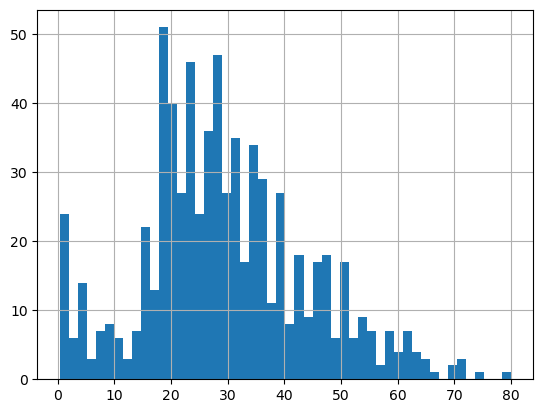

In [90]:
df.Age.hist(bins=50)